Import Packages and Read Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\micha\\Downloads\\COVID clinical trials.csv")


Inspect Data
1. Look at variables
2. look for nulls
3. make exploratory plots


Research Questions
1. What kind of studies are being performed?
    a. Proportions of study types
    b. What are the different intervention models
    c. What types of assignment (random, non-random)

In [3]:
print(df.columns)

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')


Rename unclear column names

In [4]:
df.rename(columns = {'Study Results' : 'Are Results Available?'}, inplace = True)

Summary of Status of Studies:
1. Recruiting - Currently recruiting participants 
2. Completed - Data collection is complete
3. Not yet recruiting - Recruitment has not started
4. Active, not recruiting - Data collection is ongoing
5. Enrolling by invitation - Not open to anyone in the population who meets the study criteria, but rather is enrolling by invitation only
6. Withdrawn - Ended before enrolling participants 
7. Terminated - Data collection was ended prematurely
8. Suspended - Data collection was ended but may resume later
9. Available - Expanded access for this treatment is now available for patients not involved in the study
10. No longer available - Expanded access for this treatment was available but is no longer available
11. Approved for marketing - This treatment is approved by the FDA for public use
12. Temporarily not available - Expanded access for this treatment is not currently available but may be in the future 

** Expanded Access means that the treatment's availability is broadened to include patients who are not involved in the study

Filter out CTs that are missing substantial data.
3. No Enrollment Information

In [5]:
set(df['Outcome Measures'])
sum(df['Outcome Measures'].isna())

35

In [6]:
filtered_df = df[
                (df['Enrollment'].isna() == False) 
                & (df['Study Designs'].isna() == False)
                #& ()
                ]
print(len(filtered_df))
print(len(df))


5748
5783


I used Tableau to create exploratory plots

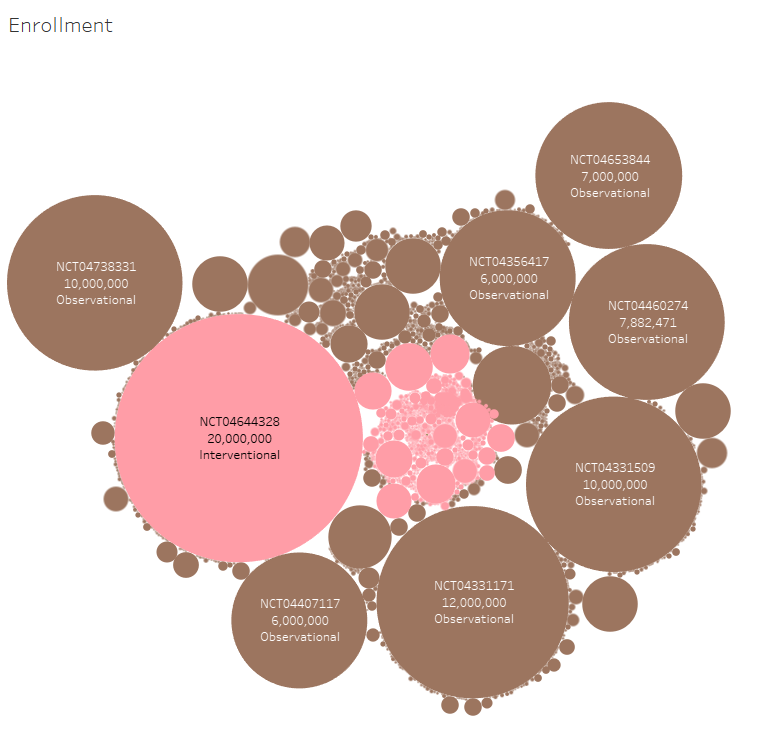

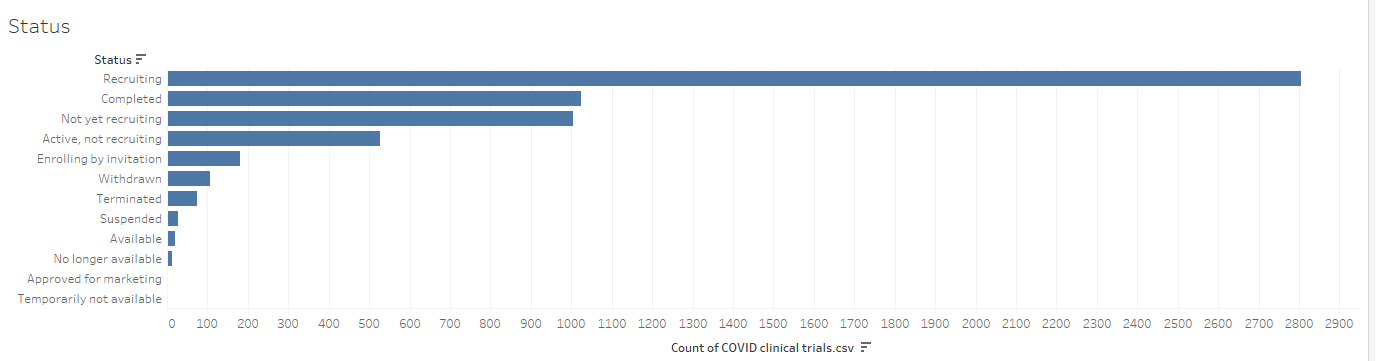

In [7]:
set(df['Study Designs'])
print(df['Study Designs'][:10])


0    Allocation: N/A|Intervention Model: Single Gro...
1    Allocation: Randomized|Intervention Model: Par...
2    Observational Model: Cohort|Time Perspective: ...
3    Observational Model: Cohort|Time Perspective: ...
4    Observational Model: Cohort|Time Perspective: ...
5    Allocation: N/A|Intervention Model: Single Gro...
6    Allocation: N/A|Intervention Model: Single Gro...
7    Observational Model: Case-Control|Time Perspec...
8    Allocation: Non-Randomized|Intervention Model:...
9    Allocation: Non-Randomized|Intervention Model:...
Name: Study Designs, dtype: object


Split 'Study Designs' Variable into separate variables

In [8]:
# need to separate out into variables
'''
Allocation type: randomized, non-randomized, missing
Intervention or Observation:
Assignment type: Single group assignment (int), parallel assignment (int), other (obs), cohort (obs), case-only (obs)
Masking: single(ppt), Double, Triple, quad, none 
Time-Perspective: retrospective, cross-sectional, prospective
Objective: prevention, other, 
'''

'\nAllocation type: randomized, non-randomized, missing\nIntervention or Observation:\nAssignment type: Single group assignment (int), parallel assignment (int), other (obs), cohort (obs), case-only (obs)\nMasking: single(ppt), Double, Triple, quad, none \nTime-Perspective: retrospective, cross-sectional, prospective\nObjective: prevention, other, \n'

In [12]:
# NOTE: Probably would be better to have used re.find to extract strings. Although this allows easier way to catch NAs.

allocation_list = []
model_list = []
model_type_list = []
time_list = []
masking_list = []
purpose_list = []
for design in filtered_df['Study Designs']:
    try:
        if 'N/A|' in design or 'Allocation' not in design: #NOTE: 'N/A|' only ever appears after Allocation, so no need to check that it come after Allocation
            allocation_list.append('N/A')
        elif 'Non-Randomized' in design:
            allocation_list.append('Non-Randomized')
        elif 'Randomized' in design:
            allocation_list.append('Randomized')
        else: # DOESN'T TRIGGER
            print('new allocation type:', design)
        

        # TODO: refractor these by creating list of possible variables to reduce amount of code
        if 'Observational Model' in design:
            model_list.append('Observational Model')
            model_variables_observation = ['Cohort', 'Case-Only', 'Case-Control', 'Ecologic or Community', 
                                           'Case-Crossover', 'Family-Based', 'Model: Other']
            found = False
            for model_type in model_variables_observation:
                if model_type in design:
                    model_type_list.append(model_type)
                    found = True
            if not found: # DOESN'T TRIGGER
                print('new observation model:', design)

        elif 'Intervention Model' in design:
            model_list.append('Intervention Model')
            model_variables_intervention = ['Single Group Assignment', 'Parallel Assignment', 
                                            'Crossover Assignment', 'Factorial Assignment', 
                                            'Sequential Assignment']
            found = False
            for model_type in model_variables_intervention:
                if model_type in design:
                    model_type_list.append(model_type)
                    found = True
            if not found: # DOESN'T TRIGGER
                print('new intervention model:', design) 

        else:
            print('NEITHER intervention of observation:', design) # DOESN'T TRIGGER


        if 'Time Perspective' in design:
            time_variables = ['Prospective', 'Cross-Sectional', 'Retrospective', 'Time Perspective: Other']
            found = False
            for time in time_variables:
                if time in design:
                    time_list.append(time)
                    found = True
            if not found: # DOESN'T TRIGGER
                print('new time type:', design) 
        else:
            time_list.append('NA')


        if 'Masking' in design:
            masking_variables = ['None', 'Masking: Single', 'Double', 'Triple', 'Quadruple'] # NOTE: there are many subtypes in single,double, etc.
            found = False
            for masking in masking_variables:
                if masking in design:
                    masking_list.append(masking)
                    found = True
            if not found: # DOESN'T TRIGGER
                print('new masking type:', design)
        else:
            masking_list.append('NA')


        if 'Primary Purpose' in design:
            purpose_variables = ['Treatment', 'Prevention', 'Diagnostic', 'Basic Science', 'Health Services Research', 
                                 'Screening', 'Supportive Care', 'Device Feasibility', 'Primary Purpose: Other']
            found = False
            for purpose in purpose_variables:
                if purpose in design:
                    purpose_list.append(purpose)
                    found = True
            if not found: # DOESN'T TRIGGER
                print('new type of purpose:', design)
        else:
            purpose_list.append('NA')
        
        
    except: # DOESN'T TRIGGER
        print('ERROR:', design)

Add the new variables to the dataframe:

In [13]:
filtered_df['Allocation'] = allocation_list
filtered_df['Model'] = model_list
filtered_df['Time'] = time_list
filtered_df['Masking'] = masking_list
filtered_df['Purpose'] = purpose_list
print(filtered_df)

      Rank   NCT Number                                              Title  \
0        1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1        2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2        3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3        4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4        5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   
...    ...          ...                                                ...   
5778  5779  NCT04011644  Mobile Health for Alcohol Use Disorders in Cli...   
5779  5780  NCT04681339  Antibiotic Prescription in Children Hospitaliz...   
5780  5781  NCT04740229  Moderate-intensity Flow-based Yoga Effects on ...   
5781  5782  NCT04804917           3-year Follow-up of the Mind My Mind RCT   
5782  5783  NCT04680000  Chronic Pain Management In Primary Care Using ...   

           Acronym                  Status Are Results Availabl

C:\Users\micha\AppData\Local\Temp\ipykernel_18652\2444283023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Allocation'] = allocation_list
C:\Users\micha\AppData\Local\Temp\ipykernel_18652\2444283023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Model'] = model_list
C:\Users\micha\AppData\Local\Temp\ipykernel_18652\2444283023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [14]:
filtered_df['Masking']

0         None
1       Triple
2           NA
3           NA
4           NA
         ...  
5778      None
5779        NA
5780    Double
5781        NA
5782      None
Name: Masking, Length: 5748, dtype: object

In [16]:
# To display all columns (or rows)
pd.set_option('display.max_columns', None)
filtered_df.head()

,Rank,NCT Number,Title,Acronym,Status,Are Results Available?,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,Allocation,Model,Time,Masking,Purpose
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,"18 Years and older (Adult, Older Adult)",Not Applicable,1000.0,Other,Interventional,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898,N/A,Intervention Model,NA,None,Diagnostic
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,60.0,Other,Interventional,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136,Randomized,Intervention Model,NA,Triple,Treatment
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482,N/A,Observational Model,Retrospective,NA,NA
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,"Child, Adult, Older Adult",NaN,2500.0,Industry,Observational,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061,N/A,Observational Model,Retrospective,NA,NA
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,18 Years to 48 Years (Adult),NaN,50.0,Other,Observational,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924,N/A,Observational Model,Prospective,NA,NA


Tableau visualizations / seaborn
    -use map feature in tableau
    -sparate out countries by Locations

In [59]:
location_list = []
for location in filtered_df["Locations"]:
    if type(location) != str:
        location_list.append('NA')

    elif type(location) == str:
        country = location.split(", ")[-1]
        location_list.append(country)

    else:
        print('NEW TYPE:', location) # DOESN'T TRIGGER

filtered_df.loc[:,'Country'] = location_list


C:\Users\micha\AppData\Local\Temp\ipykernel_18652\1935288146.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'Country'] = location_list


Save cleaned data to csv file for use in Tableau

In [60]:
filtered_df.to_csv("clinical_trial_data.csv")